In [1]:
import numpy as np
import math 
import pandas as pd

In [2]:
#dimension is dynamically set according to input value 
def createPoints(numOfPoints):
    outputArray = []
    for i in range(numOfPoints):
        val = input("Enter your value: ").split(',')
        val = list(map(float, val))
        outputArray.append(val)
    
    return outputArray

In [4]:
cluster_array = createPoints(5)

Enter your value: 0,0
Enter your value: 0,2
Enter your value: 1.5,0
Enter your value: 5,0
Enter your value: 5,2


In [5]:
cluster_array

[[0.0, 0.0], [0.0, 2.0], [1.5, 0.0], [5.0, 0.0], [5.0, 2.0]]

In [6]:
#Euclidean Distance of an array of points with dynamic dimenstion (could be 2,3,4 and so on)
def eDistance(inputArray):
    numOfPoints = len(inputArray)
    outputArray = np.zeros((numOfPoints,numOfPoints))  
    for i in range(len(inputArray)):
        for j in range(i+1,len(inputArray)):
            if j > i :
                subtractedArray = np.subtract(inputArray[i],inputArray[j])
                squaredArray = np.square(subtractedArray)
                summedArray = np.sum(squaredArray)
                sqrtArray = np.sqrt(summedArray)
                outputArray[i][j] = sqrtArray.round(2)
                outputArray[j][i] = sqrtArray.round(2)
    
    return outputArray
                
            

In [7]:
distance_matrix = eDistance(cluster_array)
print(distance_matrix)

[[0.   2.   1.5  5.   5.39]
 [2.   0.   2.5  5.39 5.  ]
 [1.5  2.5  0.   3.5  4.03]
 [5.   5.39 3.5  0.   2.  ]
 [5.39 5.   4.03 2.   0.  ]]


<AxesSubplot:xlabel='[x]', ylabel='[y]'>

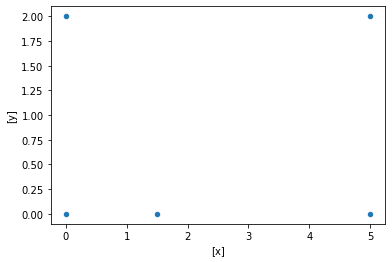

In [8]:
df = pd.DataFrame(cluster_array, columns =['x','y'])
df.plot.scatter(x=['x'],y=['y'])


In [10]:
df = pd.DataFrame(distance_matrix, index =['p1', 'p2', 'p3', 'p4', 'p5'],columns =['p1', 'p2', 'p3', 'p4', 'p5'])
df

,p1,p2,p3,p4,p5
p1,0.00,2.00,1.50,5.00,5.39
p2,2.00,0.00,2.50,5.39,5.00
p3,1.50,2.50,0.00,3.50,4.03
p4,5.00,5.39,3.50,0.00,2.00
p5,5.39,5.00,4.03,2.00,0.00


In [590]:
distance_matrix[1][2] = 0.15
distance_matrix[2][1] = 0.15
distance_matrix[3][4] = 0.29
distance_matrix[4][3] = 0.29
distance_matrix[0][5] = 0.23
distance_matrix[5][0] = 0.23
distance_matrix[0][1] = 0.24
distance_matrix[1][0] = 0.24
distance_matrix[1][3] = 0.20
distance_matrix[3][1] = 0.20
distance_matrix[1][5] = 0.25
distance_matrix[5][1] = 0.25
distance_matrix[2][3] = 0.15
distance_matrix[3][2] = 0.15
distance_matrix[2][5] = 0.11
distance_matrix[5][2] = 0.11

In [591]:
df = pd.DataFrame(distance_matrix, index =['p1', 'p2', 'p3', 'p4', 'p5', 'p6'],columns =['p1', 'p2', 'p3', 'p4', 'p5', 'p6'])
df

,p1,p2,p3,p4,p5,p6
p1,0.00,0.24,0.22,0.37,0.34,0.23
p2,0.24,0.00,0.15,0.20,0.14,0.25
p3,0.22,0.15,0.00,0.15,0.28,0.11
p4,0.37,0.20,0.15,0.00,0.29,0.22
p5,0.34,0.14,0.28,0.29,0.00,0.39
p6,0.23,0.25,0.11,0.22,0.39,0.00


# necessary tricks for python coding
#remove the row and column of a matrix
distance_matrix_new = distance_matrix[0:-1,0:-1] #selects row from 0 to -1 means the second last one of both row and column

#finds the index of the non zero minimum value
index = np.where(distance_matrix == np.amin(distance_matrix[np.nonzero(distance_matrix)])) 
#same thing above with the cordinates separated (this is the one we use)
result = np.where(distance_matrix == 0.1)
listOfCordinates = list(zip(result[0], result[1]))
listOfCordinates[0][1]

#set any string user input as the variable name and assign value to it with "locals()"
string = 'p2'
locals()['p1'] = 3 # is equivalent to p1 = 3
locals()[string] = 4 # is equivalent to p2 = 4

5

In [11]:
from tabulate import tabulate

In [537]:
#distance_matrix.shape[0] # no. of points

array([[0.  , 0.23, 0.22, 0.37, 0.34, 0.24],
       [0.23, 0.  , 0.15, 0.19, 0.14, 0.24],
       [0.22, 0.15, 0.  , 0.16, 0.28, 0.1 ],
       [0.37, 0.19, 0.16, 0.  , 0.29, 0.22],
       [0.34, 0.14, 0.28, 0.29, 0.  , 0.39],
       [0.24, 0.24, 0.1 , 0.22, 0.39, 0.  ]])

In [614]:
#for ***MIN*** hierarchical cluster
distance_matrix_new = distance_matrix

#index of the updated table
string = []
for i in range(distance_matrix_new.shape[0]):
    string.append(str(i+1))

#initial distance matrix    
df_new = pd.DataFrame(distance_matrix_new, index = string, columns = string)
print(tabulate(df_new, headers = 'keys', tablefmt = 'grid'))

for i in range(100):
    try:
        # calculate the new min value after deletion of row and column of the actual distance matrix
        minValue = np.amin(distance_matrix_new[np.nonzero(distance_matrix_new)])
        print(minValue)
        # but get the index from the original distance matrix
        result = np.where(distance_matrix_new == minValue)
        index = list(zip(result[0], result[1]))
        i = index[0][0]
        j = index[0][1]
        maxIndex = max(i,j)
        print('('+str(i+1)+','+str(j+1)+')')
        
        for row in range(len(distance_matrix_new)):
            distance_matrix_new[row][i] = min(distance_matrix_new[row][i],distance_matrix_new[row][j])
            
        distance_matrix_new = np.delete(distance_matrix_new, maxIndex,0)
        distance_matrix_new = np.delete(distance_matrix_new, maxIndex,1)
        string[i] = '('+string[i]+'U'+string[j]+')'
        string.pop(j)
        df_new = pd.DataFrame(distance_matrix_new,index = string, columns = string)
        #df = df.rename(columns={str(i): str(i)+'U'+str(j)}, index={str(i): str(i)+'U'+str(j)})
        print(tabulate(df_new, headers = 'keys', tablefmt = 'grid'))
    except:
        break


+----+----------+----------+----------+----------+----------+----------+
|    |        1 |        2 |        3 |        4 |        5 |        6 |
+====+==========+==========+==========+==========+==========+==========+
|  1 | 0        | 0.234307 | 0.21587  | 0.367696 | 0.34176  | 0.235372 |
+----+----------+----------+----------+----------+----------+----------+
|  2 | 0.234307 | 0        | 0.143178 | 0.194165 | 0.143178 | 0.243516 |
+----+----------+----------+----------+----------+----------+----------+
|  3 | 0.21587  | 0.143178 | 0        | 0.158114 | 0.284605 | 0.10198  |
+----+----------+----------+----------+----------+----------+----------+
|  4 | 0.367696 | 0.194165 | 0.158114 | 0        | 0.284253 | 0.219545 |
+----+----------+----------+----------+----------+----------+----------+
|  5 | 0.34176  | 0.143178 | 0.284605 | 0.284253 | 0        | 0.386005 |
+----+----------+----------+----------+----------+----------+----------+
|  6 | 0.235372 | 0.243516 | 0.10198  | 0.219545 | 

In [559]:
distance_matrix_new

array([[0.  , 0.23, 0.22, 0.37, 0.34, 0.24],
       [0.23, 0.  , 0.15, 0.19, 0.14, 0.24],
       [0.22, 0.15, 0.  , 0.16, 0.28, 0.1 ],
       [0.37, 0.19, 0.16, 0.  , 0.29, 0.22],
       [0.34, 0.14, 0.28, 0.29, 0.  , 0.39],
       [0.24, 0.24, 0.1 , 0.22, 0.39, 0.  ]])

In [12]:
#for ***MAX*** hierarchical cluster
distance_matrix_new = distance_matrix

#index of the updated table
string = []
for i in range(distance_matrix_new.shape[0]):
    string.append(str(i+1))

#initial distance matrix    
df_new = pd.DataFrame(distance_matrix_new, index = string, columns = string)
print(tabulate(df_new, headers = 'keys', tablefmt = 'grid'))

for i in range(100):
    try:
        # calculate the new min value after deletion of row and column of the actual distance matrix
        minValue = np.amin(distance_matrix_new[np.nonzero(distance_matrix_new)])
        print(minValue)
        # but get the index from the original distance matrix
        result = np.where(distance_matrix_new == minValue)
        index = list(zip(result[0], result[1]))
        print(index)
        i = index[0][0]
        j = index[0][1]
        maxIndex = max(i,j)
        print('('+str(i+1)+','+str(j+1)+')')
        
        for row in range(len(distance_matrix_new)):
            if row == i:
                continue
            else:
                distance_matrix_new[row][i] = max(distance_matrix_new[row][i],distance_matrix_new[row][j])
                print(distance_matrix_new[row][i])
        distance_matrix_new = np.delete(distance_matrix_new, maxIndex,0)
        distance_matrix_new = np.delete(distance_matrix_new, maxIndex,1)
        string[i] = '('+string[i]+'U'+string[j]+')'
        string.pop(j)
        df_new = pd.DataFrame(distance_matrix_new,index = string, columns = string)
        #df = df.rename(columns={str(i): str(i)+'U'+str(j)}, index={str(i): str(i)+'U'+str(j)})
        print(tabulate(df_new, headers = 'keys', tablefmt = 'grid'))
    except:
        break


+----+------+------+------+------+------+
|    |    1 |    2 |    3 |    4 |    5 |
+====+======+======+======+======+======+
|  1 | 0    | 2    | 1.5  | 5    | 5.39 |
+----+------+------+------+------+------+
|  2 | 2    | 0    | 2.5  | 5.39 | 5    |
+----+------+------+------+------+------+
|  3 | 1.5  | 2.5  | 0    | 3.5  | 4.03 |
+----+------+------+------+------+------+
|  4 | 5    | 5.39 | 3.5  | 0    | 2    |
+----+------+------+------+------+------+
|  5 | 5.39 | 5    | 4.03 | 2    | 0    |
+----+------+------+------+------+------+
1.5
[(0, 2), (2, 0)]
(1,3)
2.5
1.5
5.0
5.39
+-------+---------+------+------+------+
|       |   (1U3) |    2 |    4 |    5 |
+=======+=========+======+======+======+
| (1U3) |    0    | 2    | 5    | 5.39 |
+-------+---------+------+------+------+
| 2     |    2.5  | 0    | 5.39 | 5    |
+-------+---------+------+------+------+
| 4     |    5    | 5.39 | 0    | 2    |
+-------+---------+------+------+------+
| 5     |    5.39 | 5    | 2    | 0    |
